SECRET WORD: DEV

1. Consider again Task 1 in the Midsem. Now, let us consider a straight line movement from point A=(0.40,0.06,0.1) to point B=(0.40,0.01,0.1). Either by making some reasonable/intuitive assumptions or using one of the approaches in the text book come up with a desired trajectory to go from point A to point B. From this approach, generate the desired end-point trajectory (position, velocity, andacceleration). Plot trajectory for end-effector position, velocity and acceleration with respect to time. Use this desired trajectory for all other tasks.

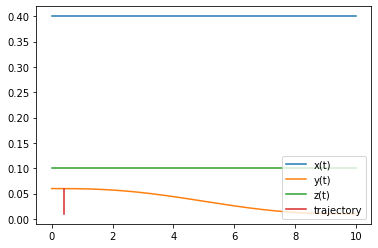

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

def cartesian(t_0, t_f):
  
  t = np.linspace(t_0,t_f,num=1000)

  A = np.array([[1, t_0, t_0**2, t_0**3, t_0**4, t_0**5],
                [0, 1, 2*t_0, 3*t_0**2, 4*t_0**3, 5*t_0**4],
                [0, 0, 2, 6*t_0, 12*t_0**2, 20*t_0**3],
                [1, t_f, t_f**2, t_f**3, t_f**4, t_f**5],
                [0, 1, 2*t_f, 3*t_f**2, 4*t_f**3, 5*t_f**4],
                [0, 0, 2, 6*t_f, 12*t_f**2, 20*t_f**3]])
  
  r = np.array([[0.4, 0.06, 0.1],
                [0,0,0],
                [0,0,0],
                [0.4, 0.01, 0.1],
                [0,0,0],
                [0,0,0]
                ]) 
  
  inv_A = np.linalg.inv(A)
  C = np.matmul(inv_A,r)
  r = [0.4, 0.06, 0.1]; rdot = [0,0,0]; rddot = [0,0,0]

  for i in range(1,len(t)):
    A_t = np.array([1, t[i], t[i]**2, t[i]**3, t[i]**4, t[i]**5]).reshape(1,-1)
    r_t = np.matmul(A_t,C).reshape(1,-1)
    r_t = np.array(r_t)
    r = np.vstack((r,r_t))
    A_dot_t = np.array([0, t[i], 2*t[i], 3*t[i]**2, 4*t[i]**3, 5*t[i]**4])
    r_dot_t = np.matmul(A_dot_t,C)
    rdot.append(r_dot_t)
    A_ddot_t = [0,0,2,6*t[i],12*t[i]**2,20*t[i]**3]
    r_ddot_t = np.matmul(A_ddot_t,C)
    rddot.append(r_ddot_t)

  plt.plot(t,r[:,0])
  plt.plot(t,r[:,1])
  plt.plot(t,r[:,2])
  plt.plot(r[:,0],r[:,1])
  plt.legend(["x(t)","y(t)","z(t)","trajectory"], loc = "lower right")
  plt.show()

t_0 = 0
t_f = 10
cartesian(t_0,t_f) 



2. Pick any one manipulator (your choice) out of Stanford, PUMA, and SCARA. Using the dimensions worked out in Task 1.a of Mid-sem exam (tweak those numbers if need be), then work out the desired trajectories in joint space. Plot these joint trajectories with respect to time. Use this same manipulator for all other tasks.

[[0.14888994760949723, -0.8851696682987095, 1.0600826270863724], [0.02499479361892016, -0.9046179420290408, 1.0918999346093923]]
[[0.39999999999999997, 0.05999999999999999, 0.10000000000000003], [0.4000000000000001, 0.010000000000000002, 0.10000000000000003]]
(6, 3)


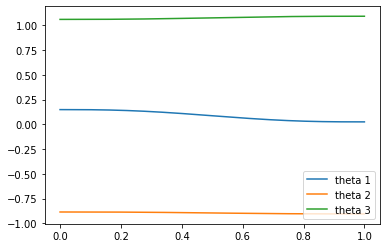

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import matshow

class sol_1():

    def __init__(self) -> None:
        self.L = 0.25 # same link lengths for all the links
        self.J = []
        pass

    def PUMA(self,corners):
        L = self.L
        J = [] 

        # Inverse Kinematics
        d_1 = 0 # joint offset is assumed to be zero
        for i in corners:
            theta_1 = math.atan2(i[1],i[0])
            D = (i[0]**2 + i[1]**2 + (i[2] - L)**2 - 2*L**2)/(2*L**2)
            theta_3 = math.atan2(math.sqrt(1 - D**2),D)
            r = math.sqrt(i[0]**2 + i[1]**2)
            s = i[2] - L
            theta_2 = math.atan2(s,r) - math.atan2(L*math.sin(theta_3),L*(1 + math.cos(theta_3)))
            j = [theta_1, theta_2, theta_3] 
            J.append(j)
        print(J)

        #Forward Kinematics
        P = [] # list of end-effector positions for A,B,C,D
        for i in J:
            z = L*math.sin(i[2]+i[1]) + L*math.sin(i[1]) + L
            y = (L*math.cos(i[2]+i[1]) + L*math.cos(i[1]))*math.sin(i[0])
            x = (L*math.cos(i[2]+i[1]) + L*math.cos(i[1]))*math.cos(i[0])
            p = [x,y,z]
            P.append(p)
        print(P)
        self.J = J
        pass

    def joint(self,t_0,t_f): # t = [t_0,t_f]
        A = np.array([[1, t_0, t_0**2, t_0**3, t_0**4, t_0**5],
            [0, 1, 2*t_0, 3*t_0**2, 4*t_0**3, 5*t_0**4],
            [0, 0, 2, 6*t_0, 12*t_0**2, 20*t_0**3],
            [1, t_f, t_f**2, t_f**3, t_f**4, t_f**5],
            [0, 1, 2*t_f, 3*t_f**2, 4*t_f**3, 5*t_f**4],
            [0, 0, 2, 6*t_f, 12*t_f**2, 20*t_f**3]])
        
        q = np.array([[self.J[0][0],self.J[0][1],self.J[0][2]],
            [0,0,0],
            [0,0,0],
            [self.J[1][0],self.J[1][1],self.J[1][2]],
            [0,0,0],
            [0,0,0]
            ])

        inv_A = np.linalg.inv(A)
        C = np.matmul(inv_A,q)
        print(np.shape(C))
        t = np.linspace(t_0,t_f,num=1000)
        q = self.J[0]; qdot = [0,0,0]; qddot = [0,0,0]

        for i in range(1,len(t)):
          A_t = np.array([1, t[i], t[i]**2, t[i]**3, t[i]**4, t[i]**5]).reshape(1,-1)
          q_t = np.matmul(A_t,C).reshape(1,-1)
          q_t = np.array(q_t)
          q = np.vstack((q,q_t))
          A_dot_t = np.array([0, t[i], 2*t[i], 3*t[i]**2, 4*t[i]**3, 5*t[i]**4])
          q_dot_t = np.matmul(A_dot_t,C)
          qdot.append(q_dot_t)
          A_ddot_t = [0,0,2,6*t[i],12*t[i]**2,20*t[i]**3]
          q_ddot_t = np.matmul(A_ddot_t,C)
          qddot.append(q_ddot_t)

        plt.plot(t,q[:,0])
        plt.plot(t,q[:,1])
        plt.plot(t,q[:,2])
        plt.legend(["theta 1","theta 2","theta 3"], loc = "lower right")
        plt.show()

A = [0.40,0.06,0.1]
B = [0.40,0.01,0.1]
corners = [A,B]
t_0 = 0
t_f = 1
solution = sol_1()
solution.PUMA(corners)
solution.joint(t_0,t_f)